In [165]:
import pandas as pd
import os

In [166]:
df = pd.read_csv('scores/handle_time_score.csv', index_col=0)
df

,old,prophet,kpi,start_train,end_train
BRO-Co,17326.333333,13187.170243,handle_time,2018-10-01,2020-10-01
RIS_ah,155039.622951,132135.213482,handle_time,2017-01-20,2020-06-01
BRO_ah,23283.428571,22159.426852,handle_time,2018-11-01,2020-11-01
CS-Mar,22951.642857,15619.191911,handle_time,2018-11-01,2020-11-01
PSG_ah,100356.166667,65889.087301,handle_time,2018-10-01,2020-10-01
CS-Joh,19263.483607,20963.020361,handle_time,2017-01-01,2020-06-01
CS-Nat,11322.122807,7020.772130,handle_time,2017-01-01,2020-09-01
CS-Ala,5689.785714,3825.260409,handle_time,2018-11-01,2020-11-01
WISE-C,352606.070175,213364.695370,handle_time,2016-01-20,2020-09-01
RCS-PH,22891.500000,25941.952687,handle_time,2018-11-01,2020-11-01


In [167]:
df['diff (hours)'] = (df['old'] - df['prophet'])/3600
diff = df[df['diff (hours)']>0]['diff (hours)']
diff

BRO-Co     1.149768
RIS_ah     6.362336
BRO_ah     0.312223
CS-Mar     2.036792
PSG_ah     9.574189
CS-Nat     1.194820
CS-Ala     0.517924
WISE-C    38.678160
Name: diff (hours), dtype: float64

In [168]:
hours_saved = diff.sum()

print('Daily handle time Saved:',round(hours_saved,1))
print('Annual Savings:',"${:,.2f}".format(hours_saved * 262 * 25))

Daily handle time Saved: 59.8
Annual Savings: $391,861.67


# approximately 55 hours per day in handle time savings
accross 262 business days at approximately `$25 per hour = $391,861.67 per year` in labor allocation cost savings.

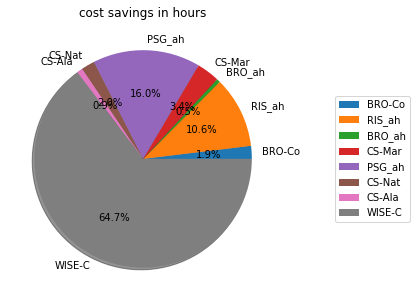

In [169]:
import matplotlib.pyplot as plt

df['diff (hours)'][df['diff (hours)']>0].plot.pie(autopct='%0.1f%%', figsize=(5, 5),
                                          shadow=True)
plt.title('cost savings in hours')
plt.ylabel('')
plt.legend(loc='right', bbox_to_anchor=(1.5,0.5))
plt.show()